# CS-EJ3311 - Deep Learning with Python, 09.09.2020-18.12.2020

## Round 1 -   Gradient Based Optimization and Learning

Shamsi Abdurakhmanova and Alexander Jung

Aalto University, Espoo, Finland 
Fitech.io, Finland 

## Learning Goals

- understand how to learn a predictor function by minimizing a loss function

- understand how GD can be used to minimize loss function and to find optimal parameters of predictor

- understand motivation for and implementation of SGD

- understand the terms "batch", "batch size", "learning rate" and "epochs"

- be aware of some variants for gradient-based optimization methods

## Recommended Reading

-  [chapter 2.4](https://livebook.manning.com/book/deep-learning-with-python/chapter-2/193) the book "Deep Learning with Python" by F. Chollet. 

## Additional Material (Optional!)

### Hypothesis Space and Loss Functions

- Video on Hypothesis Space https://youtu.be/CDcRfak1Mh4
- Video on Loss Function https://youtu.be/Uv9lihDfsBs
- Machine Learning: Basic Principles (Chapter 2 and 3) https://arxiv.org/pdf/1805.05052.pdf

### Derivatives

- https://www.mathsisfun.com/calculus/derivatives-introduction.html
- (chapters 3-4) https://openstax.org/books/calculus-volume-1/pages/3-1-defining-the-derivative#27277

### Gradient Descent 

Video 
- Andrew Ng, https://www.youtube.com/watch?v=F6GSRDoB-Cg 
- StatQuest, https://www.youtube.com/watch?v=sDv4f4s2SB8
- 3Blue1Brown, https://www.youtube.com/watch?v=IHZwWFHWa-w

Books

- (intermediate) Machine Learning: Basic Principles (chapter 5) https://arxiv.org/pdf/1805.05052.pdf
- (advanced) Deep Learning Book https://www.deeplearningbook.org/contents/optimization.html



## Introduction


A main component of many ML methods is a **hypothesis space**. The hypothesis space of a ML method is a subset of all possible **predictor maps**. A predictor map $h(\mathbf{x})$ maps the feature vector $\mathbf{x}$ of a data point to the predicted label $\hat{y} = h(\mathbf{x})$. The main goal of many ML methods is to find a good predictor map.

For computational reasons, it is impossible to consider all possible such maps. Indeed, there are already uncountable infinite many maps that use a single real-valued feature $x$ and ouput a real-valued prediction $\hat{y}$. Therefore, every ML method that runs on a physial computer, can only use a subset of maps which we refer to as the hypothesis space underlying that ML method. 

It is important to note that the hypothesis space is a design choice. One such choice for a hypothesis space are linear maps. Another choice for the hypothesis space is given by decision trees. The ML engineer has to choose the hypothesis space based on the available computational resources and the statistical properties of the data generated in the application at hand. 

The focus of this course on a particular class of ML methods, i.e., deep learning methods. Deep learning methods use hypothesis spaces that are parametrized by a weight (or parameter) vector 

$$ \mathbf{w} = \big(w_{1},\ldots,w_{d}\big)^{T}.$$ 

The entries $w_{i}$ of the weight vector are the individual weights associated with the connections (links) of an artificial neural network (see Round 2 for more details). A particular choice for the weight vector results in a predictor map $h^{(\mathbf{w})}(\mathbf{x})$. Finding a good predictor is to find a weight vector such that the corresponding predictor $h^{(\mathbf{w})}(\mathbf{x})$ performs well. Maybe the most basic example of such a **parametrized hypothesis space** is the space of **linear predictors** 

$$ h^{(\mathbf{w})}(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} = \sum_{i=1}^{d} w_{i} x_{i}.$$

In contrast, the predictor map $h^{(\mathbf{w})}(\mathbf{x})$ obtained from an ANN using weights $\mathbf{w}$ is highly non-linear. However, the basic principle of learning a good predictor by adjusting the weight vector $\mathbf{w}$ is the same for linear regression (linear predictors) and deep learning (maps represented by ANN).

This notebook demonstrates how to find an optimal linear predictor by minimizing the average loss incurred over a training set. This average loss is also known as the **training error** of a predictor. By evaluating the training error for predictors with different weight vectors, we obtain an objective or **loss function** $f(\mathbf{w})$. The loss function maps a weight vector to the training error incurred by the predictor map corresponding to that weight vector. 

We will detail a simple iterative algorithm which is called **gradient descent** (GD). Loosely speaking, GD finds an approximate minimizer of the training error by incrementally improving the current guess for the optimal predictor (weights) by moving into the opposite gradient direction. We will also discuss a slight variation of GD which is known as **stochastic gradient descent** (SGD). SGD is one of the most widely used optimization methods within deep learning.

## Loss Function (see Sec. 1.1.5. of Course Book)

Deep learning methods aim at finding a good choice for the weights (and bias) of an **artificial neural network (ANN)**. To measure how "good" a particular choice for the weights is, we need to define a loss function. For a given pair of predicted label value $\hat{y}$ and true label value $y$, the loss function $L(y,\hat{y})$ provides a measure for the error, or "loss", incurred in predicting the true label $y$ by $\hat{y}$. We emphasize that the precise definition of the loss function is a design choice. In prinipcle, the deep learning engineer is free to define the loss function. 

However, some particular definitions for the loss function have proven useful in many applications. If the label values are numeric (like a temperature or a weight), then the squared error loss $L(y,\hat{y})=(y-\hat{y})^2$ is often a good choice for the loss function. If the label values are categories (like "cat" and "dog"), we might use  the "0/1" loss $L(y,\hat{y})=1$ if and only if $y=\hat{y}$ and $L(y,\hat{y})=0$.

Deep learning methods are fed with a large number of labeled data points 

$$\big(\mathbf{x}^{(1)},y^{(1)}\big),\ldots,\big(\mathbf{x}^{(m)},y^{(m)}\big).$$

To measure the quality of a particular choice for the weights $\mathbf{w}$ of an ANN, we first compute the resulting predictions $\hat{y}^{(i)}$ obtained when feeding the feature vectors $\mathbf{x}^{(i)}$ into the ANN. 
Then we calculate the average loss (or "training error")

$$ (1/m) \big( L(y^{(1)},\hat{y}^{(1)})+L(y^{(2)},\hat{y}^{(2)})+\ldots+L(y^{(m)},\hat{y}^{(m)}) \big).$$

Note that the training error depends on the weights $\mathbf{w}$ of the ANN via the predictions $\hat{y}^{(i)}$. Indeed, the predictions $\hat{y}^{(i)}=h^{(\mathbf{w})}\big(\mathbf{x}^{(i)}\big)$ are obtained by applying the ANN with weights $\mathbf{w}$ to the input feature vector $\mathbf{x}^{(i)}$. By evaluating the training error for different choices for the weights, we obtain a **cost function** $f(\mathbf{w})$ which guides the optimal choice for the weights $\mathbf{w}$. 

The choice for the weights resulting in minimum training error are obtained by solving 

$$ \min_{\mathbf{w} \in \mathbb{R}^{d}} f(\mathbf{w})$$.

With a slight abuse of notation, we refer to the function $f(\mathbf{w})$ also as the loss function. For a given choice for the weight vector $\mathbf{w}$, the loss function $f(\mathbf{w})$ provides a quality measure for this choice. It should be clear from context if we mean by **loss function** the training error $f(\mathbf{w})$ (which is a function of a weight vector) or the loss $L(y,\hat{y})$ itself (which is a function of a pair of label values). 

## Mean Squared Error 

Maybe the most widely used loss function for applications involving numeric label values $y \in \mathbb{R}$ is the squared error loss 

$$L(y,\hat{y}) = (\underbrace{y- \hat{y}}_{\mbox{prediction error}})^{2}.$$

We assess the quality of a predictor $\hat{y} = h^{(\mathbf{w})}(\mathbf{x})$ by the average loss incurred over a set of labeled data points (the **training set**). For the squared error loss this average is referred to as the **mean squared error (MSE)** 

$$ f(\mathbf{w}) = (1/m) \big( \big( y^{(1)}-\hat{y}^{(1)}\big)^{2}+\big( y^{(2)}-\hat{y}^{(2)}\big)^{2}+\ldots+\big( y^{(m)}-\hat{y}^{(m)}\big)^{2} \big). $$
Note that the MSE on the right hands side depends on the weight vector $\mathbf{w}$ via the predictions $\hat{y}^{(i)}$ obtained by applying the predictor map $h^{(\mathbf{w})}\big(\mathbf{x}^{(i)}\big)$. 

The shape of the loss $f(\mathbf{w})$, viewed as a function of the weights $\mathbf{w}$, depends on two components. First, it depends on how the predictor maps depends on the weights. Second, it depends on the choice for the loss function $L(y,\hat{y})$ used to measure the loss incurred by predicting the true label value $y$ with the prediction $\hat{y}$. 

The combination of linear predictor functions and the squared error loss $L(y,\hat{y})=(y-\hat{y})^{2}$ is very popular as they result in a [convex](https://en.wikipedia.org/wiki/Convex_function) and [differentiable](https://en.wikipedia.org/wiki/Differentiable_function) loss function $f(\mathbf{w})$. A convex function has the attractive property that any local minimum is always also a [global minimum](https://en.wikipedia.org/wiki/Maxima_and_minima#/media/File:Extrema_example_original.svg). If a convex function is also differentiable, it can be minimized by a simple but powerful algorithm which is known as **gradient descent**. 

<img src="MSELinPred.jpeg" alt="Drawing" style="width: 500px;"/>

Deep learning methods use predictor maps represented by an ANN with tunable weights. In this case, the predictor depends non-linearly on the weights. As a result, we obtain (highly) non-convex loss landscapes. Below you can see examples of loss function landscapes of more complicated models (neural networks), which illustrates that finding a minimum of these loss functions is not a trivial task.

<img src="NNloss.png" alt="Drawing" style="width: 500px;"/>


<center><a href="https://www.cs.umd.edu/~tomg/projects/landscapes/">image source</a></center>
<center><a href="https://arxiv.org/abs/1712.09913/">original paper</a></center>

Here you can find more examples of visualizations for loss functions obtained from representing a predictor map using ANN:

[3D visualization of NN loss functions](http://www.telesens.co/loss-landscape-viz/viewer.html) \
[3D animation of NN loss functions](https://www.youtube.com/watch?time_continue=32&v=aq3oA6jSGro&feature=emb_logo)

## Gradient Descent 

We will now introduce a simple algorithm that allows to find (good approximations to) the optimal weight $\mathbf{w}_{\rm opt}$ for a predictor map $h^{(\mathbf{w})}(\mathbf{x})$. The optimum weight vector should result in the smallest possible loss  

\begin{align} 
f(\mathbf{w}_{\rm opt}) = \min_{\mathbf{w} \in \mathbb{R}^{d}} f(\mathbf{w}) \mbox{ with } f(\mathbf{w})& = (1/m) \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)} \big)^{2} \nonumber \\ 
& =(1/m) \sum_{i=1}^{m} (y^{(i)} - h^{(\mathbf{w})}\big(\mathbf{x}^{(i)}\big) \big)^{2}. \end{align}

**Gradient descent (GD)** constructs a sequence of weight vectors $\mathbf{w}^{(0)},\mathbf{w}^{(1)},\ldots$ such that the loss values $f\big(\mathbf{w}^{(0)}\big),f\big(\mathbf{w}^{(0)}\big),\ldots$ tends toward the minimum loss. GD is an iterative algorithm that gradually improves the current guess (approximation) $\mathbf{w}^{(k)}$ for the optimum weight vector.  

There are many different strategies for choosing the first (or initial) guess $\mathbf{w}^{(0)}$. One simple approach is to chose the initial weights randomly. Given the current weight vector $w^{(k)}$, how does GD know in which "direction" to go to find a better weight vector $\mathbf{w}^{(k+1)}$?. Mathematics, or [calcululs](https://en.wikipedia.org/wiki/Differential_calculus) more precisely, tells us that this direction is precisely the opposite of the gradient $\nabla f(\mathbf{w})$. More precisely, for small step size, the steepest descent is towards the opposite direction of the [gradient](https://en.wikipedia.org/wiki/Derivative). We can think of GD as imitating a hiker who takes a sequence of (small) steps downhill. 
[read here](https://en.wikipedia.org/wiki/Gradient_descent).

<img src="GradientHiker.jpeg" alt="Drawing" style="width: 400px;"/>

Given the downhill direction $- \nabla f\big(\mathbf{w}^{(k)}\big)$ at the current estimate $\mathbf{w}^{(k)}$, we take a step 

$$\mbox{(Gradient Step)} \quad \underbrace{\mathbf{w}^{(k+1)}}_{\mbox{new guess}} = \underbrace{\mathbf{w}^{(k)}}_{\mbox{current guess}} - \underbrace{\alpha}_{\mbox{step size}} \nabla f\big(\mathbf{w}^{(k)}\big).$$ 

Here, we used a tuning parameter $\alpha>0$ which adjusts the step size for the step downlhill. We will refer to this parameter as the **learning rate**. This name is due to the fact that chosing a larger value for $\alpha$ tends to speed up the progress of GD to reach the optimum weight vector. Thus, increasing the value of $\alpha$ tends to speed up the learning of a good weight vector for a predictor map $h^{(\mathbf{w})}$. 

The GD algorithm amounts to chosing a suitable value for the learning rate $\alpha$ and initial guess $\mathbf{w}^{(0)}$ and then repeating the gradient step for a sufficient number of iterations. One possible stopping criterion is to use a fixed number of iterations which might be dictated by constraints on processing duration we grant for GD (computing time costs money, [see here](https://aws.amazon.com/emr/pricing/)). 

Another option is to monitor the loss function and stop if consecutive iterates do not result in any significant decrease. Similarly, we could monitor the valiation loss which is obtained by applying the predictor map using the current GD iterate $\mathbf{w}^{(k)}$ to validation data which is different form the training data used to define the training loss. 

A key challenge in the use of GD is to find a good choice for the learning rate $\alpha$. If the learning rate is too small (left plot below), the GD steps make too litte progress and thus requires an excessive number of iterations to get close to the optimum weight vector. Conversely, if the learning rate is too high (right plot below), it is possible that GD iterates $\mathbf{w}^{(k)}$ will "overshoot" the minimum and climb up the loss function on the other side of the minimum (GD diverges). 

<img src="lrate.png" alt="Drawing" style="width: 800px;"/>

The figure below visualizes how GD adapts the weights $\mathbf{w}$ of a linear predictor $h^{(\mathbf{w})}(\mathbf{x})= \mathbf{w}^{T} \mathbf{x}$ to better fit the labeled data points (left) resulting in a smaller MSE (right). Note that after around $100$ iterations, gradient descent found weight vectors resulting in an almost minimum MSE. The additional iterations (beyond $100$) are (in some sense) a waste of computation as they do not decrease the MSE significantly. 

![SegmentLocal](plainGD.gif "segment")

In order to gain some intuition about the functioning of GD, let us work out the gradient update for the special case of linear predictors maps $h^{(\mathbf{w})}(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$. Here, we can find a closed-form expression for the gradient: 

\begin{align} 
\nabla f\big( \mathbf{w}^{(k)} \big)= - (2/m) \sum_{i=1}^{m}\mathbf{x}^{(i)} \big(y^{(i)} - \big( \mathbf{w}^{(k)}\big)^{T} \mathbf{x}^{(i)} \big) \big). \end{align}

The gradient update of GD then becomes, in turn, 

\begin{align} 
\mathbf{w}^{(k+1)} & = \mathbf{w}^{(k)} + (2/m) \sum_{i=1}^{m}\mathbf{x}^{(i)} \big(y^{(i)} - \big( \mathbf{w}^{(k)}\big)^{T} \mathbf{x}^{(i)} \big)\nonumber \\ 
 & = \mathbf{w}^{(k)} + (2/m) \sum_{i=1}^{m}\mathbf{x}^{(i)} \big( y^{(i)} - \hat{y}^{(i)} \big) 
. \end{align}

Note that the gradient update involves the computation of the predictions $\hat{y}^{(i)} = \big( \mathbf{w}^{(k)}\big)^{T} \mathbf{x}^{(i)}$. We will refer to this evaluation of the predictor map also as a **forward pass**. After the forward pass, the weight vector $\mathbf{w}^{(k)}$ is updated by a weighted combination of the feature vectors $\mathbf{x}^{(i)}$. The weight for the $i$th feature vector $\mathbf{x}^{(i)}$ is given by the prediction error $ \big( y^{(i)} - \hat{y}^{(i)} \big)$ incurred by the current weight vector for that data point. Thus, the gradient update puts more emphasize (larger weight) on those data points $\big(\mathbf{x}^{(i)},y^{(i)}\big)$ which are not well predicted using the current weight vector $\mathbf{w}^{(k)}$. 



## Stochastic Gradient Descent 

Despite its conceptual simplicity, GD might be difficult to use in ML applications involing massive amounts of data. Consider image classification where state-of-the art deep learning methods are trained on billions of images. The challenge in using GD for such big data applications is the computational complexity of computing the gradient $\nabla f\big( \mathbf{w}^{(k)} \big)$ of the loss function at the current estimate $\mathbf{w}^{(k)}$. Let us have a closer look at the computation of the gradient for the special case of linear predictor maps $h^{(\mathbf{w})}(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$. In this case, we can find a closed-form expression for the gradient: 

\begin{align} 
\nabla f\big( \mathbf{w}^{(k)} \big)= - (2/m) \sum_{i=1}^{m}\mathbf{x}^{(i)} \big(y^{(i)} - \big( \mathbf{w}^{(k)}\big)^{T} \mathbf{x}^{(i)} \big) \big). \end{align}

The challenge is that the summation involves all $m$ data points that form the training set. Thus, we might need to sum over billions of data points which might be stored decentralized all over the internet. A single iteration of GD might simply take too long in such a setting. 

In order to avoid the computational burden of computing the gradient, stochastic GD (SGD) approximates the gradient 
by using only a small subset (a "batch") of training data points. SGD is obtained from GD by replacing the exact gradient step by a noisy gradient update: 
$$\mbox{(Noisy Gradient Step)} \quad \underbrace{\mathbf{w}^{(k+1)}}_{\mbox{new guess}} = \underbrace{\mathbf{w}^{(k)}}_{\mbox{current guess}} - \underbrace{\alpha^{(k)}}_{\mbox{step size}}\mathbf{g}^{(k)} \mbox{ with } \mathbf{g}^{(k)} \approx \nabla f\big(\mathbf{w}^{(k)}\big).$$ 
Note that we now use a varying step-size $\alpha^{(k)}$ that changes along the iterations. This is necessary in order to attenuate the noise in the gradient estimate $\mathbf{g}^{(k)}$. 

The most basic variant of SGD uses a single randomly chosen data point $\big(\mathbf{x}^{(i)},y^{(i)}$ for computing the gradient estimate $\mathbf{g}^{(k)}$. For the special case of linear predictor maps, we obtain 
$$ \mathbf{g}^{(k)}   = 2 \mathbf{x}^{(I)} \big(y^{(I)} - \big( \mathbf{w}^{(k)}\big)^{T} \mathbf{x}^{(I)} \big) \big).$$
Note that the index $I$ of the data point is chosen randomly and indepdently for each new iteration $k$. Comparing this gradient estimate with the above formula for the exact gradient, we see that the SGD iteration does not require any summation over the training set. For large training sets this might yield a significant reduction in computational requirements for SGD compared to GD. 

Plain SGD and GD can be interpreted as spaces cases of **mini-batch SGD**. Mini-batch SGD does not use a single randomly chosen data point to compute the gradient estimate but rather uses several randomly chosen data points that form a batch $\mathcal{S} = \big\{ \big(\mathbf{x}^{(i_{1})},y^{(i_{1})} \big),\ldots,\big(\mathbf{x}^{(i_{S})},y^{(i_{S})} \big) \big\}$ of size $S$. For linear predictor maps, the gradient estimate is computed using the batch via 
$$ \mathbf{g}^{(k)}   = 2 \sum_{\big(\mathbf{x},y\big) \in \mathcal{S}} \mathbf{x} \big(y - \big( \mathbf{w}^{(k)}\big)^{T} \mathbf{x} \big) \big).$$
Each iteration of mini-batch SGD uses a different batch of $S$ different data points. When the algorithm pass through all batches, or through **entire dataset**, we say that algorithm ran for one **epoch**. For example, if the training data set consists of $100$ data points and we use a batch size of $S=10$, then one epoch requires $100/10 = 10$ iterations of mini-batch SGD. 

We can order the SGD algorithms discussed so far based on the **batch size** (number of samples per batch):

- GD (batch size = size of dataset)
- Mini-batch SGD (1 < batch size < whole dataset)
- plain SGD (batch size = 1)

The pros of using batches instead of the entire dataset is that it is computationally easier, therefore faster and cons - it requires more learning time (more epochs to run). 

Many machine learning and deep learning Python libraries, such as `sklearn` and `keras`, provide ready-to-use gradient based optimization algorithms. However, it is instructive to implement our own simplified mini-batch stochastic gradient descent (or mini-batch SGD) algorithm for learning purposes. In this simple case we have 100 data points (samples) which are described by only one feature `X` and have labels stored in `y`. \
We need to find the optimal linear predictor `y_pred = weight*X`.

First, we import all needed Python libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression 

Next, we will generate some dataset by using sklearn.dataset `make_regression` function.

In [2]:
# generate dataset for regression problem

X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=2) 
X = X.reshape(-1,)
X = preprocessing.scale(X)

We used sklearn `preprocessing` module ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn-preprocessing-scale)) to scale our features `X`. Learn [here](https://www.youtube.com/watch?v=r5E2X1JdHAU&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=20), why it is useful to normalize the data when applying the gradient descent algorithm. 

Before implementing the SGD algorithm, we need to write a helper function `batch()` that divides the dataset into small batches. We will provide the feature matrix `X` and label vector `y` as an input to the function. We also need to define the parameter `batch_size` which is the number of data points used for a single batch. The function `batch()` is a [Python generator function](https://docs.python.org/3/howto/functional.html#generators), meaning that the function can be used in for-loops and will return batches sequentially, one-by-one. Before splitting the dataset into batches, we will randomly shuffle the data. This ensures that every time we call `batch()` we obtain a batch having the same statistical properties. Loosely speaking, by shuffling the dataset before selecting the batch makes the individual data points independent and identically distributed ("i.i.d."). 

In [9]:
def batch(X,y,batch_size):
    
    '''
    
    This is a function for creating minibatches of the dataset.
    The yield statement suspends function’s execution and sends 
    a value back to the caller, but retains enough state to enable 
    function to resume where it is left off. 
    
    '''
    # check if the number of data points is equal in feature matrix X and label vector y
    # if assertion fails return error message "Number of data points are different in X and y"
    assert X.shape[0] == y.shape[0], "Number of datapoints are different in X and y"
    
    # shuffle data points 
    # permutation will randomly re-arrange the order of the numbers
    # which will be used as indices to create X and y with data points in different order
    p = np.random.permutation(len(y))
    X_perm = X[p] 
    y_perm = y[p]
    
    # generate batches
    for i in range(0,X.shape[0],batch_size):
        yield (X_perm[i:i + batch_size], y_perm[i:i + batch_size])

Next we implement a single gradient step. It will be implemented in a `grad_descent()` function. This function has as its input parameters the feature matrix `X`, the label vector `y`, the initial guess for the weights and a learning rate. The function `grad_descent()` will:

1. compute predictions for the data points in the bach, given the current weights
2. compute MSE loss 
3. compute gradient of the loss function
4. update the weights - change the weights values to the opposite direction from gradient `weight = weight - lrate*gradient`



In [10]:
def gradientstep(X,y,weight,lrate):
    
    '''
    
    This is a function for performing palin gradient descent algorithm with MSE loss function.

    squared error loss for a single data point:        
      loss = (y - weight*x)**2
    derivative w.r.t. to weight for a single data point:  
      der_w = -2x*(y - weight*x)
      
    To compute the MSE and derivative of MSE - take an average of all data points.
    
    '''
    
    # performing Gradient Descent:
    
    # 1. compute predictions, given the weight
    y_hat = weight*X   
    # 2. compute MSE loss
    MSE = np.mean((y - y_hat)**2)
    # 3. compute gradient of loss function
    der_w = -2*np.mean(X*(y - y_hat))  
    # 4. update the weights
    weight = weight - lrate* der_w            
 
    return weight, MSE 

Finally, we combine all elements in `minibatchSGD()` function. The parameters of the function: \
`X` - features \
`y` - labels   \
`batch_size` - number of samples per batch \
`epoches` - how many times to iterate through the ENTIRE dataset \
`lrate` - step size or learning rate of gradient descent

The function will return learnt weight after running the algorithm through entire dataset epoches times.
In addition, the function will return list `loss` where the MSE loss values for all batches and epoches are stored.

In [11]:
def minibatchSGD(X,y,batch_size,epochs,lrate):  
    
    # initialize weight randomly
    weight = np.random.rand()    
    # create list to store the loss values 
    loss = []
     
    for i in range(epochs):
        # run gradient descent for each batch
        for X_batch,y_batch in batch(X,y,batch_size):
            weight, MSE = gradientstep(X_batch,y_batch,weight,lrate)
            # store MSE loss of each batch of each epoch
            loss.append(MSE)
            
        # one epoch is finished when the algorithm goes through ALL batches
    return weight, loss

Let's test our SGD implementation and run the algorithm for:

- batch sizes = 1 (one data point) **("true" SGD)**
- batch sizes = 10 **(mini-batch SGD)**
- batch sizes = 100 (entire dataset) **(Batch GD)**

In [12]:
# set epoches and learning rate
epochs = 200
lrate = 0.1

# batch size 1
model1 = minibatchSGD(X,y,1,epochs,lrate)
# batch size 10
model2 = minibatchSGD(X,y,10,epochs,lrate)
# batch size 100
model3 = minibatchSGD(X,y,100,epochs,lrate)

The function `minibatchSGD()` returns weight and loss incurred during the training. Let's retrieve the loss values for plotting and print out learnt weights.

In [13]:
# history of the MSE loss inccured during learning
batch_loss1 = model1[-1]
batch_loss2 = model2[-1]
batch_loss3 = model3[-1]

# let's check that length of list `loss` is equal to
# X.shape[0]/batch_size*epochs
print("Epochs: ", epochs)
print("Iterations per epoch: {:.0f}, {:.0f}, {:.0f},".format(X.shape[0]/1, X.shape[0]/10, X.shape[0]/100))
print("Total number of iterations: ",len(batch_loss1), len(batch_loss2), len(batch_loss3))

# display weight learnt during the SGD
print("\nWeights: \n\nSGD with batch size=1 results in weight w={:.2f} \nSGD with batch size =10 w={:.2f} \nbatch size=100 {:.2f}".format(model1[0], model2[0], model3[0]))

Epochs:  200
Iterations per epoch: 100, 10, 1,
Total number of iterations:  20000 2000 200

Weights: 

SGD with batch size=1 results in weight w=58.77 
SGD with batch size =10 w=60.93 
batch size=100 60.27


We can compare the optimal weights learnt by our algorithm and the optimal weight calculated by sklearn `LinearRegression()` class. This class does not use iterative gradient-based algorithms, but rather calculating optimal weight analytically [learn more here](https://www.youtube.com/watch?v=B-Ks01zR4HY).


In [14]:
# create linear regression model 
reg = LinearRegression(fit_intercept=False) 
# fit a linear regression model 
reg = reg.fit(X.reshape(-1,1), y)
# print optimal coefficients
reg.coef_[0]

60.27113167581487

Thus, our simple GD algorithm does not deviate too much from the `sklearn` implementation of linear regression. Note that the deviations are larger for smaller batch size. This is makes sense, as the gradient estimates are more accurate when we use more datapoints in a batch. \
It is useful to plot the loss values incurred during the training or learning. Let us plot the loss values for first 100 iterations (for first 100 batches).

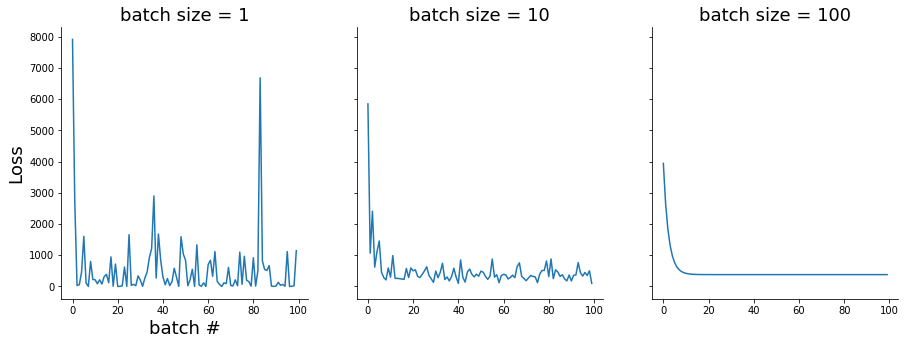

In [15]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,5))

batch_loss_list = [batch_loss1, batch_loss2, batch_loss3]
size_list       = [1,10,100] # batch size


for ax, batch_loss, size in zip(axes, batch_loss_list, size_list):
    ax.plot(np.arange(len(batch_loss[:100])), batch_loss[:100])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_title("batch size = "+str(size), fontsize=18)
    
axes[0].set_xlabel('batch #', fontsize=18)
axes[0].set_ylabel('Loss', fontsize=18)


plt.show()

The above figure indicates that when using SGD with a small batch size, the loss is not decreasing monotoncially but somewhat randomly fluctuating around a long-term decreasing trend. This happens because the weight updates use "noisy" estimates of the gradient. The noisy estimate is calculated by an averaging process using the data points in the mini-batch. The smaller the mini-batch size, the fewer data points we use for computing the average. Thus, the gradient noise becomes stronger with smaller batch size.

Below are the animations illustrating the training process with SGD where batch size is all data points (upper panel) and where batch size is 10 data points (lower panel, the current batch marked with red color). In line with loss plots we created above, mini-batch SGD is more noisy than batch GD. Although, it seems that using plain batch GD is faster way to reach the minimum of the loss function, in practice when working with large datasets and thousands parameters (weights) in neural networks, this approach will be slower and more computationally expensive than mini-batch SGD.

**Illustration of SGD iterations for batch size = 100 (batch covers entire dataset)** 
![SegmentLocal](minibatchGD1.gif "segment")
**Illustration of SGD iterations for batch size = 10 datapoints**
![SegmentLocal](minibatchGD2.gif "segment")
During each iteration of SGD, 10 data points are randomly selected to constitute a batch. This batch is used 
to compute the gradient estimate. The data points in the batch are shown in red. Note that during 
each iteration, a different set of 10 data points is chosen for the batch. 

# Variants of Gradient-Based Optimization Algorithms

Beside plain GD or mini-batch SGD, many deep learning methods use somewhat more advanced variants of gradient-based algorithms or optimizers ([list of optimizers available in deep learning Python library Keras](https://keras.io/api/optimizers/)). Some of the most most known are SGD with momentum, RMSprop and Adam. 

Much like GD and SGD, these algorithms use gradients of the loss function $f(\mathbf{w})$ to find weights $\mathbf{w}$ such that the predictor $h^{(\mathbf{w})}$ achieves (nearly) minimum loss. These variants differ in how they use (or "interpret") the gradient information to find the fastest route towards the minimum. In some cases these variants can find good weight vectors significantly faster (using fewer iterations) compared to mini-batch SGD. 

The animation below compares the "routes" taken by different optimizers to find a minimum of the [six-hump camel](https://www.sfu.ca/~ssurjano/camel6.html) function. 

![SegmentLocal](camel3D.gif "segment")

## Conclusion 

We have discussed the basic idea of using gradients of loss functions to iteratively improve the parameter values (weights) in a predictor map. Gradient based methods turn out to be the perfect tool for deep learning mehtods in several aspects. Somehwat surprisingly, stochastic gradient descent (and its variants) are able to quickly find values for the parameters (weights) of a (deep) artificial neural network such that it performs well on new data points which are different from the training data. Moreover, mini-batch SGD requires only to have enough working memory ("RAM") to store the current batch (subset) of training data points instead of the entire dataset (which might be billions of high-resolution images). 


**Recommended reading:**

- Deep Learning with Python F.Chollet, [chapter 2.4](https://livebook.manning.com/book/deep-learning-with-python/chapter-2/193)

**Additional materials:**

*derivatives*

- https://www.mathsisfun.com/calculus/derivatives-introduction.html
- (chapters 3-4) https://openstax.org/books/calculus-volume-1/pages/3-1-defining-the-derivative#27277

*gradient descent algorithm*

Video 
- Andrew Ng, https://www.youtube.com/watch?v=F6GSRDoB-Cg 
- StatQuest, https://www.youtube.com/watch?v=sDv4f4s2SB8
- 3Blue1Brown, https://www.youtube.com/watch?v=IHZwWFHWa-w

Books

- (intermediate) Machine Learning: Basic Principles (chapter 5) https://arxiv.org/pdf/1805.05052.pdf
- (advanced) Deep Learning Book https://www.deeplearningbook.org/contents/optimization.html

# Quiz 

### Q1

Why do we need a loss function in machine learning?

1. To transform the data into a computer friendly format. 
2. To speed up the learning process of a ML method. 
3. To measure the quality of a predictor obtained from a ML method. 
4. To reduce the memory requirements of a ML method. 

### Q2

Consider the average loss, or training error, incurred by a predictor with weights $\mathbf{w}$ on a set of labeled data points, or trainin set. Which of the following statemets are correct?

1. The training error depends only on the labels $y^{(1)},\ldots,y^{(m)}$. 
2. The training error depends on the features, labels and weights. 
3. The training error does not depend on the features $\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(m)}$.
4. The training error does not depend on the labels. 
5. The training error does not depend on the weights. 

### Q3

Gradient descent is a ...

1. method to avoid overfitting
2. iterative algorithm for a loss function minimization
3. method to compute the optimal parameters in one step
4. method to divide the data into batches


### Q4

Consider the update rule of GD: $\mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} - \alpha \nabla f(\mathbf{w}^{(k)})$ with learning rate $\alpha >0$. Here, $f(\mathbf{w})$ is the MSE incurred by a linear predictor $h(\mathbf{x}) = \mathbf{w})^{T} \mathbf{x}$ on a training set $\big(\mathbf{x}^{(1)},y^{(m)}\big),\ldots,\big(\mathbf{x}^{(1)},y^{(m)}\big)$. Which of the following statements are correct?

1. The GD iterates $\mathbf{w}^{(1)}, \mathbf{w}^{(2)},\ldots,$ will always converge.  
2. The GD iterates will converge if we choose the learning rate $\alpha$ sufficiently small. 
3. The GD iterates will converge if we choose the learning rate sufficiently large. 
4. The GD iterates will converge only for certain training sets. 

### Q5

Compare to GD, SGD ...

1. has reduced computaional cost 
2. makes the learning path less noisy
3. requires less training data
4. always converges faster, i.e., requires fewer iterations to deliver a weight vector that is within a prescribed distance to the optimum weight vector. 

### Q6

Which of the following statements are correct? 

1. batch size is always equal to 1 
2. epochs is the total number of iterations SGD performes
3. during the gradient descent we change the weights values to the same direction as gradient
4. epochs is the number of times SGD goes through entire dataset


### Q7

Consider a dataset with 4800 data points. If we run mini-bath SGD with a batch size of 320 and for 100 epochs, what is the total number of iterations used in SGD?

1. 160000
2. 15
3. 7500
4. 30
